<a href="https://colab.research.google.com/github/luismanriqueruiz/machine_learning/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing customer segmentation

## Loading libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

In [2]:
path = '/content/drive/MyDrive/Colab_Notebooks/RL/Shoppings'

In [3]:
data = pd.read_csv(path + '/marketing_campaign.csv', sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
print(f'Number of records: {data.shape[0]}')

Number of records: 2240


In [5]:
df = data.copy()

In [6]:
df["TotalAmountSpent"] = df["MntFishProducts"] + df["MntFruits"] + df["MntGoldProds"] + df["MntSweetProducts"] + df["MntMeatProducts"] + df["MntWines"]
df['Age'] = 2023 - df['Year_Birth']

In [7]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [8]:
df['education_cl'] = df['Education']
df.loc[df['education_cl'].isin(['2n Cycle', 'Basic']), 'education_cl'] = 'school'

In [9]:
df = pd.concat([df, pd.get_dummies(df['education_cl'])], axis=1)
df.drop(['Education', 'education_cl'], axis=1, inplace=True)
df.head()

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalAmountSpent,Age,Graduation,Master,PhD,school
0,5524,1957,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,66,1,0,0,0
1,2174,1954,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27,69,1,0,0,0
2,4141,1965,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776,58,1,0,0,0
3,6182,1984,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53,39,1,0,0,0
4,5324,1981,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422,42,0,0,1,0


In [10]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [11]:
df['Marital_Status_cl'] = df['Marital_Status']
df.loc[df['Marital_Status_cl'].isin(['Alone', 'Absurd', 'YOLO']), 'Marital_Status_cl'] = 'Single'
df = pd.concat([df, pd.get_dummies(df['Marital_Status_cl'])], axis=1)
df.drop(['Marital_Status', 'Marital_Status_cl'], axis=1, inplace=True)
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalAmountSpent,Age,Graduation,Master,PhD,school,Divorced,Married,Single,Together,Widow
0,5524,1957,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,66,1,0,0,0,0,0,1,0,0
1,2174,1954,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27,69,1,0,0,0,0,0,1,0,0
2,4141,1965,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776,58,1,0,0,0,0,0,0,1,0
3,6182,1984,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53,39,1,0,0,0,0,0,0,1,0
4,5324,1981,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422,42,0,0,1,0,0,1,0,0,0


In [12]:
df.drop(['Year_Birth', 'Dt_Customer'], axis=1, inplace=True)

In [13]:
for i in df.columns:
    print(f'{i}: {df[i].nunique()}')

ID: 2240
Income: 1974
Kidhome: 3
Teenhome: 3
Recency: 100
MntWines: 776
MntFruits: 158
MntMeatProducts: 558
MntFishProducts: 182
MntSweetProducts: 177
MntGoldProds: 213
NumDealsPurchases: 15
NumWebPurchases: 15
NumCatalogPurchases: 14
NumStorePurchases: 14
NumWebVisitsMonth: 16
AcceptedCmp3: 2
AcceptedCmp4: 2
AcceptedCmp5: 2
AcceptedCmp1: 2
AcceptedCmp2: 2
Complain: 2
Z_CostContact: 1
Z_Revenue: 1
Response: 2
TotalAmountSpent: 1054
Age: 59
Graduation: 2
Master: 2
PhD: 2
school: 2
Divorced: 2
Married: 2
Single: 2
Together: 2
Widow: 2


<AxesSubplot:>

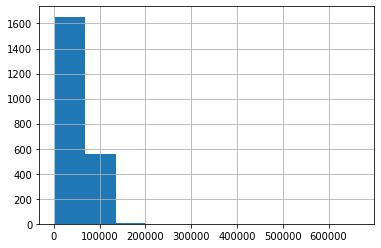

In [14]:
df['Income'].hist()

In [15]:
df.head()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalAmountSpent,Age,Graduation,Master,PhD,school,Divorced,Married,Single,Together,Widow
0,5524,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,66,1,0,0,0,0,0,1,0,0
1,2174,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27,69,1,0,0,0,0,0,1,0,0
2,4141,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776,58,1,0,0,0,0,0,0,1,0
3,6182,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53,39,1,0,0,0,0,0,0,1,0
4,5324,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422,42,0,0,1,0,0,1,0,0,0


In [16]:
df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
TotalAmountSpent        0
Age                     0
Graduation              0
Master                  0
PhD                     0
school                  0
Divorced                0
Married                 0
Single                  0
Together                0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
MntFishProducts         0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntSweetProducts        0
AcceptedCmp3            0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Widow                   0
dtype: int64

In [17]:
df_fix = df[~df['Income'].isnull()].copy()

In [18]:
df_fix.head()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalAmountSpent,Age,Graduation,Master,PhD,school,Divorced,Married,Single,Together,Widow
0,5524,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1617,66,1,0,0,0,0,0,1,0,0
1,2174,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,27,69,1,0,0,0,0,0,1,0,0
2,4141,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,776,58,1,0,0,0,0,0,0,1,0
3,6182,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,53,39,1,0,0,0,0,0,0,1,0
4,5324,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,422,42,0,0,1,0,0,1,0,0,0


In [116]:
categorical_vars = ['Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 
                    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain',
                    'Z_Revenue', 'Response', 'Graduation',
                    'Master', 'PhD', 'school', 'Divorced', 'Married', 'Single', 'Together', 'Widow']

In [20]:
for col in categorical_vars:
    df_fix[col] = df_fix[col].astype('category')

df_fix.dtypes

ID                        int64
Income                  float64
Kidhome                category
Teenhome               category
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3           category
AcceptedCmp4           category
AcceptedCmp5           category
AcceptedCmp1           category
AcceptedCmp2           category
Complain               category
Z_CostContact          category
Z_Revenue              category
Response               category
TotalAmountSpent          int64
Age                       int64
Graduation             category
Master                 category
PhD                    category
school                 category
Divorced

In [21]:
df_fix.drop('Z_CostContact', axis=1, inplace=True)
df_fix.columns

Index(['ID', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_Revenue', 'Response', 'TotalAmountSpent',
       'Age', 'Graduation', 'Master', 'PhD', 'school', 'Divorced', 'Married',
       'Single', 'Together', 'Widow'],
      dtype='object')

In [22]:
def diff_between_lists(l1, l2):
    s = set(l2)
    temp3 = [x for x in l1 if x not in s]
    return(temp3)

numerical_vars = diff_between_lists(df_fix.columns.tolist(), categorical_vars)
numerical_vars = [x for x in numerical_vars if x != 'ID']

In [23]:
def analysis_skewness(column):
    res = column.skew()

#· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
#· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
#· If the skewness is less than -1 or greater than 1, the data are highly skewed

    val=0
    if (res > -0.5 and res < 0.5):
        val = "symmetrical"
    if (res >= -1 and res <= -0.5) | (res >= 0.5 and res <= 1):
        val = "moderately skewed"
    if (res < -1) | (res > 1):
        val = "highly skewed"
    return(res, val)


def analysis_kurtosis(column):
    res = column.kurt()

#    If the distribution is tall and thin it is called a leptokurtic distribution(Kurtosis > 3). 
# Values in a leptokurtic distribution are near the mean or at the extremes.

# · A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is 
# called platykurtic(Kurtosis <3) distribution.

# · A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution 
# is called a mesokurtic(Kurtosis=3) distribution. A mesokurtic distribution looks more close to a normal distribution.

    val=2
    if (res > 3):
        val = "leptokurtic"
    if (res < 3):
        val = "platykurtic"
    
    return(res, val)


df_fix[numerical_vars].skew(axis=0).sort_values(ascending=True)

Recency                0.001648
NumWebVisitsMonth      0.218043
Age                    0.353661
NumStorePurchases      0.701826
TotalAmountSpent       0.858055
MntWines               1.170720
NumWebPurchases        1.197037
MntGoldProds           1.839231
NumCatalogPurchases    1.881075
MntFishProducts        1.916369
MntMeatProducts        2.025577
MntFruits              2.101658
MntSweetProducts       2.103328
NumDealsPurchases      2.415272
Income                 6.763487
dtype: float64

In [24]:
analysis_skewness(df_fix['NumStorePurchases'])

(0.7018262973284631, 'moderately skewed')

In [25]:
analysis_kurtosis(df_fix['NumStorePurchases'])

(-0.6264621905184886, 'platykurtic')

In [26]:
for col in numerical_vars:
    print(f'{col} skewness: {analysis_skewness(df_fix[col])}')
    print(f'{col} kurtosis: {analysis_kurtosis(df_fix[col])}')
    print('-------------------')

Income skewness: (6.7634873728111184, 'highly skewed')
Income kurtosis: (159.63669957780044, 'leptokurtic')
-------------------
Recency skewness: (0.0016477067463847978, 'symmetrical')
Recency kurtosis: (-1.199776860736612, 'platykurtic')
-------------------
MntWines skewness: (1.1707200955543913, 'highly skewed')
MntWines kurtosis: (0.5827411213782012, 'platykurtic')
-------------------
MntFruits skewness: (2.101657525150595, 'highly skewed')
MntFruits kurtosis: (4.05408152559753, 'leptokurtic')
-------------------
MntMeatProducts skewness: (2.0255768067844633, 'highly skewed')
MntMeatProducts kurtosis: (5.055476675925979, 'leptokurtic')
-------------------
MntFishProducts skewness: (1.916368950232168, 'highly skewed')
MntFishProducts kurtosis: (3.0764762986354275, 'leptokurtic')
-------------------
MntSweetProducts skewness: (2.1033275863706797, 'highly skewed')
MntSweetProducts kurtosis: (4.106140620240588, 'leptokurtic')
-------------------
MntGoldProds skewness: (1.839230936129571

<AxesSubplot:>

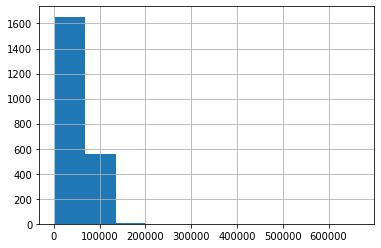

In [27]:
df_fix['Income'].hist()

<AxesSubplot:>

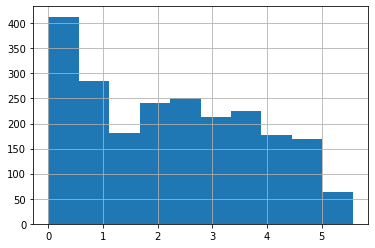

In [44]:
np.log(df_fix['MntSweetProducts'] + 1).hist()


## Reducing right skewness (positive skewness)
- Square root
- Cube root
- Logarithms
- Reciprocals (x -> 1/x or x -> -1/x)

## Reducing left skewness (negative skewness)
- Squares
- Cube
- High powers

<AxesSubplot:>

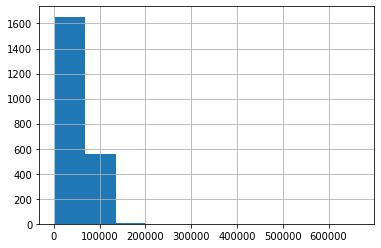

In [28]:
df_fix['Income'].hist()

<AxesSubplot:>

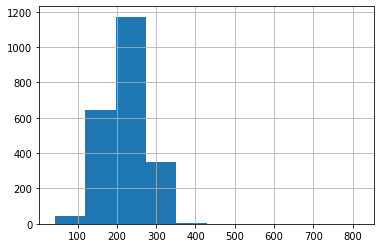

In [29]:
(np.sqrt(df_fix['Income'])).hist()

<AxesSubplot:>

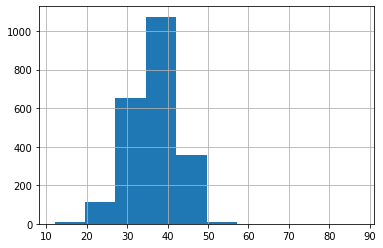

In [30]:
(np.cbrt(df_fix['Income'])).hist()

<AxesSubplot:>

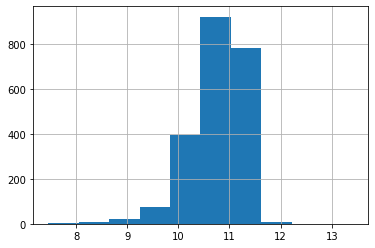

In [31]:
(np.log(df_fix['Income'])).hist()

<AxesSubplot:>

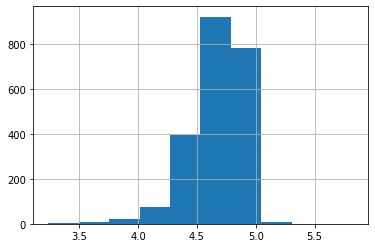

In [32]:
(np.log10(df_fix['Income'])).hist()

<AxesSubplot:>

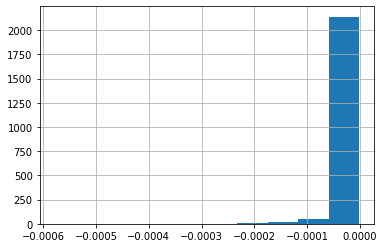

In [33]:
(-1/df_fix['Income']).hist()

In [34]:
from scipy.stats import kstest, shapiro 

In [35]:
test = df_fix['Income']
res = kstest(test, 'norm')
res.pvalue


0.0

In [36]:
test = np.sqrt(df_fix['Income'])
kstest(test, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

In [37]:
test = np.cbrt(df_fix['Income'])
kstest(test, 'norm')

#Since the p-value is less than .05, we reject the null hypothesis of the Kolmogorov-Smirnov test.
#This means we have sufficient evidence to say that the sample data does not come from a normal distribution.

KstestResult(statistic=1.0, pvalue=0.0)

ShapiroResult(statistic=0.9232487678527832, pvalue=3.2837640401731995e-32)

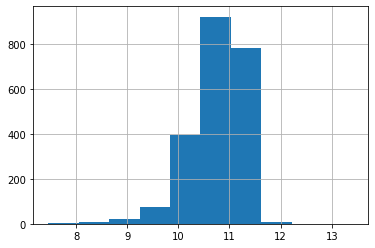

In [38]:
np.log(df_fix['Income']).hist()
shapiro(np.log(df_fix['Income']))

# Since the p-value is less than .05, we reject the null hypothesis of the Shapiro-Wilk test.
# This means we have sufficient evidence to say that the sample data does not come from a normal distribution.

To do:
- Define numerical and categorical data

**For Numerical data:**
- [Skewness](https://www.kaggle.com/getting-started/110134)

- Scaling

- [k-modes](https://www.geeksforgeeks.org/k-mode-clustering-in-python/)

## Fixing skewness

In [105]:
df_fix_skew = df_fix.copy()
df_fix_skew.drop('ID', axis=1, inplace=True)
df_fix_skew.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_Revenue,Response,TotalAmountSpent,Age,Graduation,Master,PhD,school,Divorced,Married,Single,Together,Widow
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,11,1,1617,66,1,0,0,0,0,0,1,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,11,0,27,69,1,0,0,0,0,0,1,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,11,0,776,58,1,0,0,0,0,0,0,1,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,11,0,53,39,1,0,0,0,0,0,0,1,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,11,0,422,42,0,0,1,0,0,1,0,0,0


In [106]:
changed_variables = []

for col in numerical_vars:
    _, level = analysis_skewness(df_fix_skew[col])
    if level == 'highly skewed':
        df_fix_skew[col] = np.log10(df_fix_skew[col] + 1)
        changed_variables.append(col)

df_fix_skew.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_Revenue,Response,TotalAmountSpent,Age,Graduation,Master,PhD,school,Divorced,Married,Single,Together,Widow
0,4.764468,0,0,58,2.803457,1.949390,2.737987,2.238046,1.949390,1.949390,0.602060,0.954243,1.041393,4,7,0,0,0,0,0,0,11,1,1617,66,1,0,0,0,0,0,1,0,0
1,4.666003,1,1,38,1.079181,0.301030,0.845098,0.477121,0.301030,0.845098,0.477121,0.301030,0.301030,2,5,0,0,0,0,0,0,11,0,27,69,1,0,0,0,0,0,1,0,0
2,4.854998,0,0,26,2.630428,1.698970,2.107210,2.049218,1.342423,1.633468,0.301030,0.954243,0.477121,10,4,0,0,0,0,0,0,11,0,776,58,1,0,0,0,0,0,0,1,0
3,4.425648,1,0,26,1.079181,0.698970,1.322219,1.041393,0.602060,0.778151,0.477121,0.477121,0.000000,4,6,0,0,0,0,0,0,11,0,53,39,1,0,0,0,0,0,0,1,0
4,4.765624,1,0,94,2.240549,1.643453,2.075547,1.672098,1.447158,1.204120,0.778151,0.778151,0.602060,6,5,0,0,0,0,0,0,11,0,422,42,0,0,1,0,0,1,0,0,0


In [107]:
changed_variables

['Income',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases']

## Clustering

In [51]:
!pip install prince
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
from prince import FAMD
from kmodes.kprototypes import KPrototypes

In [79]:
# Position of categorical variables
ind_dict = dict((k,i) for i,k in enumerate(df_fix_skew.columns))
inter = set(ind_dict).intersection(categorical_vars)
indices = [ ind_dict[x] for x in inter ]
indices.sort()

In [80]:
# Analzing clusters
clusters = KPrototypes(n_clusters=5).fit_predict(df_fix_skew, categorical=indices)
clusters

array([1, 4, 0, ..., 1, 0, 4], dtype=uint16)

In [81]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_fix_skew)
result_pca = pca.transform(df_fix_skew)
result_pca = pd.DataFrame(result_pca, columns=['PC1', 'PC2'])
result_pca.head()

,PC1,PC2
0,1009.941029,8.083109
1,-580.061801,-10.335193
2,168.929594,-23.154812
3,-554.134851,-22.573346
4,-185.053903,45.082008


In [82]:
result_pca['color'] = clusters

<Figure size 864x864 with 0 Axes>

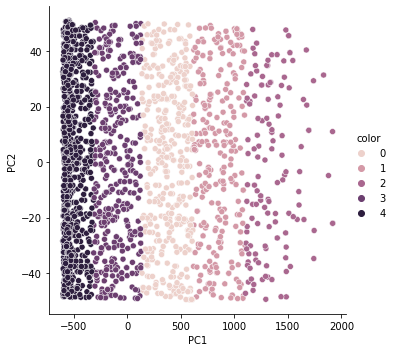

In [83]:
plt.figure(figsize=(12, 12))
sns.relplot(data=result_pca, x='PC1', y='PC2', hue='color')
plt.show()

In [88]:
changed_variables

['Income',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases']

In [85]:
a = np.log10(9-1)
a

0.9030899869919435

In [87]:
10**(a) + 1

9.0

In [108]:
df_fix_skew['cluster'] = clusters
df_fix_skew.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_Revenue,Response,TotalAmountSpent,Age,Graduation,Master,PhD,school,Divorced,Married,Single,Together,Widow,cluster
0,4.764468,0,0,58,2.803457,1.949390,2.737987,2.238046,1.949390,1.949390,0.602060,0.954243,1.041393,4,7,0,0,0,0,0,0,11,1,1617,66,1,0,0,0,0,0,1,0,0,1
1,4.666003,1,1,38,1.079181,0.301030,0.845098,0.477121,0.301030,0.845098,0.477121,0.301030,0.301030,2,5,0,0,0,0,0,0,11,0,27,69,1,0,0,0,0,0,1,0,0,4
2,4.854998,0,0,26,2.630428,1.698970,2.107210,2.049218,1.342423,1.633468,0.301030,0.954243,0.477121,10,4,0,0,0,0,0,0,11,0,776,58,1,0,0,0,0,0,0,1,0,0
3,4.425648,1,0,26,1.079181,0.698970,1.322219,1.041393,0.602060,0.778151,0.477121,0.477121,0.000000,4,6,0,0,0,0,0,0,11,0,53,39,1,0,0,0,0,0,0,1,0,4
4,4.765624,1,0,94,2.240549,1.643453,2.075547,1.672098,1.447158,1.204120,0.778151,0.778151,0.602060,6,5,0,0,0,0,0,0,11,0,422,42,0,0,1,0,0,1,0,0,0,3


## Rescaling features

In [109]:
for col in changed_variables:
    df_fix_skew[col] = df_fix_skew[col].apply(lambda x: 10**(x) + 1)

df_fix_skew.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_Revenue,Response,TotalAmountSpent,Age,Graduation,Master,PhD,school,Divorced,Married,Single,Together,Widow,cluster
0,58140.0,0,0,58,637.0,90.0,548.0,174.0,90.0,90.0,5.0,10.0,12.0,4,7,0,0,0,0,0,0,11,1,1617,66,1,0,0,0,0,0,1,0,0,1
1,46346.0,1,1,38,13.0,3.0,8.0,4.0,3.0,8.0,4.0,3.0,3.0,2,5,0,0,0,0,0,0,11,0,27,69,1,0,0,0,0,0,1,0,0,4
2,71615.0,0,0,26,428.0,51.0,129.0,113.0,23.0,44.0,3.0,10.0,4.0,10,4,0,0,0,0,0,0,11,0,776,58,1,0,0,0,0,0,0,1,0,0
3,26648.0,1,0,26,13.0,6.0,22.0,12.0,5.0,7.0,4.0,4.0,2.0,4,6,0,0,0,0,0,0,11,0,53,39,1,0,0,0,0,0,0,1,0,4
4,58295.0,1,0,94,175.0,45.0,120.0,48.0,29.0,17.0,7.0,7.0,5.0,6,5,0,0,0,0,0,0,11,0,422,42,0,0,1,0,0,1,0,0,0,3


In [111]:
df_fix_skew.dtypes

Income                  float64
Kidhome                category
Teenhome               category
Recency                   int64
MntWines                float64
MntFruits               float64
MntMeatProducts         float64
MntFishProducts         float64
MntSweetProducts        float64
MntGoldProds            float64
NumDealsPurchases       float64
NumWebPurchases         float64
NumCatalogPurchases     float64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3           category
AcceptedCmp4           category
AcceptedCmp5           category
AcceptedCmp1           category
AcceptedCmp2           category
Complain               category
Z_Revenue              category
Response               category
TotalAmountSpent          int64
Age                       int64
Graduation             category
Master                 category
PhD                    category
school                 category
Divorced               category
Married                category
Single  

In [118]:
df_fix_skew.groupby(['cluster']).agg('mean')

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,TotalAmountSpent,Age
cluster,,,,,,,,,,,,,,,
0,67674.936118,48.877150,501.729730,49.877150,252.120393,70.904177,50.828010,75.931204,4.447174,7.982801,6.815725,8.955774,4.095823,989.390663,57.041769
1,75077.645522,52.007463,727.380597,62.130597,440.339552,90.380597,67.402985,80.130597,3.768657,7.522388,8.108209,8.458955,3.552239,1455.764925,55.197761
2,81575.000000,48.481481,971.629630,74.614815,662.059259,108.081481,73.170370,84.622222,3.355556,7.414815,8.533333,7.874074,3.162963,1962.177778,53.777778
3,53232.055138,46.834586,272.182957,23.240602,103.902256,30.035088,22.062657,56.062657,5.553885,7.872180,4.330827,6.731830,5.706767,495.486216,56.215539
4,35618.289970,49.204568,41.312810,6.494538,22.875869,8.125124,6.848064,15.577954,4.063555,4.049652,2.506455,3.171797,6.419067,89.234359,51.999007


## References

[When Do You Reject the Null Hypothesis?](https://www.statology.org/when-to-reject-null-hypothesis/)